<a href="https://colab.research.google.com/github/mmuchsin/submission-ml-dicoding/blob/main/pengembangan_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Pertama : Membuat Model NLP dengan TensorFlow**

## **Identitas**



*   Nama  : M Muchsin
*   Email : m.muchsin21@gmail.com



## **Data Collecting**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#unduh data mentah
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 47.3MB/s]


In [ ]:
#ektraksi data
!unzip /content/emotions-dataset-for-nlp.zip

Archive:  /content/emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## **Data Cleaning**

In [ ]:
df1 = pd.read_csv('test.txt', delimiter=';')
df2 = pd.read_csv('train.txt', delimiter=';')
df3 = pd.read_csv('val.txt', delimiter=';')

In [ ]:
df1.columns = ['sentence', 'feeling']
df2.columns = ['sentence', 'feeling']
df3.columns = ['sentence', 'feeling']

In [ ]:
df = pd.concat([df1,df2,df3])

In [ ]:
df.head()

,sentence,feeling
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear


In [ ]:
feeling = pd.get_dummies(df['feeling'])

In [ ]:
df_update = pd.concat([df, feeling], axis=1)

In [ ]:
df_update.drop(columns='feeling', inplace=True)

In [ ]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  19997 non-null  object
 1   anger     19997 non-null  uint8 
 2   fear      19997 non-null  uint8 
 3   joy       19997 non-null  uint8 
 4   love      19997 non-null  uint8 
 5   sadness   19997 non-null  uint8 
 6   surprise  19997 non-null  uint8 
dtypes: object(1), uint8(6)
memory usage: 429.6+ KB


In [ ]:
df_update.head()

,sentence,anger,fear,joy,love,sadness,surprise
0,im updating my blog because i feel shitty,0,0,0,0,1,0
1,i never make her separate from me because i do...,0,0,0,0,1,0
2,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
3,i was feeling a little vain when i did this one,0,0,0,0,1,0
4,i cant walk into a shop anywhere where i do no...,0,1,0,0,0,0


In [ ]:
X = df_update['sentence'].to_numpy()
y = df_update.loc[:,'anger':'surprise'].to_numpy()

## **Data Preproccessing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
 
sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

## **Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

### **Training Model**

In [ ]:
history = model.fit(
                    padded_train,
                    y_train,
                    epochs=30,
                    callbacks=[callbacks], 
                    validation_data=(padded_test, y_test)
                    )

Epoch 1/30
500/500 [==============================] - 23s 41ms/step - loss: 1.2971 - accuracy: 0.4833 - val_loss: 0.7120 - val_accuracy: 0.7475
Epoch 2/30
500/500 [==============================] - 20s 40ms/step - loss: 0.4799 - accuracy: 0.8371 - val_loss: 0.4187 - val_accuracy: 0.8610
Epoch 3/30
500/500 [==============================] - 20s 41ms/step - loss: 0.2756 - accuracy: 0.8998 - val_loss: 0.3679 - val_accuracy: 0.8802
Epoch 4/30
500/500 [==============================] - 20s 40ms/step - loss: 0.2082 - accuracy: 0.9277 - val_loss: 0.3303 - val_accuracy: 0.8925

Akurasi telah mencapai >90%!


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

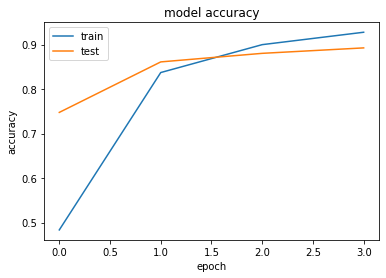

In [ ]:
#histori akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

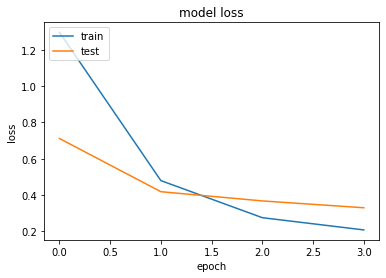

In [ ]:
#histori los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()